# Isotherm data import and analysis

In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import csv
import xlrd
import os
import os.path
from pathlib2 import Path
%matplotlib inline

## import experimental data for plotting purposes
data is imported into dictionary: datdict, which has format:

```{filename:np.array(Mean Molecular Area, Surface Pressure, STdev}```

In [17]:
indir = '/gpfs/amarolab/monolayers/carter_mixed_exp_data/'
def extractDataFromXLSX(infile):
    data = xlrd.open_workbook(infile).sheet_by_index(0)
    xvals = []
    yvals = []
    evals = []
    try:
        for i in range(2,2000):
            xvals.append(data.cell(i,0).value)
            yvals.append(data.cell(i,1).value)
            evals.append(data.cell(i,2).value)
    except IndexError: 
        #print('end')
        pass
    q = np.array([xvals, yvals, evals])
    return(q)

datdict = {}
for root, dirs, filenames in os.walk(indir):
    for f in filenames:
        h = f.replace(' ', '_')
        #print(g)
        datdict[h] = extractDataFromXLSX(indir+f)
        #dat2_matrix.append(extractDataFromXLSX(indir+f))
print(datdict)

{'3Mix_0.4_M_NaCl_pH_8.2.xlsx': array([[  1.20400000e+01,   1.20628700e+01,   1.20857500e+01, ...,
          3.48442500e+01,   3.48671300e+01,   3.48900000e+01],
       [  6.96676100e+01,   6.96041000e+01,   6.95397300e+01, ...,
         -9.78000000e-03,  -9.65000000e-03,  -8.90000000e-03],
       [  2.07306000e+00,   2.11906000e+00,   2.16789000e+00, ...,
          1.54900000e-02,   1.53300000e-02,   1.43100000e-02]]), '4Mix-LA_0.4_M_NaCl_pH_8.2.xlsx': array([[  7.92   ,   7.96323,   8.00647, ...,  51.02353,  51.06677,  51.11   ],
       [ 77.64879,  77.16757,  76.78858, ...,  -0.93546,  -0.93804,
         -0.93945],
       [  6.83627,   6.65088,   6.37161, ...,   1.54737,   1.55064,
          1.55471]]), '3Mix_0.4_M_NaCl_pH_5.6.xlsx': array([[  1.20600000e+01,   1.20866300e+01,   1.21132500e+01, ...,
          3.86067500e+01,   3.86333700e+01,   3.86600000e+01],
       [  6.40351300e+01,   6.40315700e+01,   6.40280000e+01, ...,
         -4.76600000e-02,  -4.87800000e-02,  -4.99000000

## import GMX data

In [24]:
surface_areas = ['SA19-1_20ns', 'SA19-2_100ns', 'SA19-3_20ns',
                 'SA19.5_100ns', 'SA19.5-2_20ns', 'SA19.5-3_20ns',
                 'SA20_20ns', 'SA20-2_20ns', 'SA20-3_100ns',
                 'SA21_100ns', 'SA21-2_20ns', 'SA21-3_20ns', 
                 'SA22_20ns', 'SA22-2_20ns', 'SA22-3_100ns', 
                 'SA24_20ns', 'SA24-2_20ns', 'SA24-3_100ns']
n_surface_areas = ['SA19', 'SA19.5', 'SA20', 'SA20.5','SA21','SA22','SA23','SA24']
filedir = '/gpfs/amarolab/monolayers/MIX1_NaCl0.4_GMX/'
filedir1 = '/gpfs/amarolab/abbyflabby/MIX/MIX1234_NaCl0.4_NAMD/'
logfiles = []
xvgfiles = [] #list of xvg filenames
pres = []
times = []
areas = []
#for narea in n_surface_areas:
#    logchunk = []
    
for area in surface_areas:
    xvgchunk = []
    timesteps=np.array([0])
    pressures=np.array([0])
    for i in range(1, 21):
        xvg = Path(filedir+area+'/step9_'+str(i)+'.xvg')
        if xvg.exists():
            xvgchunk.append(filedir+area+'/step9_'+str(i)+'.xvg')
    for p, x in enumerate(xvgchunk):
        #print(p)
        if p == 0:
            timesteps = np.genfromtxt(x, dtype='float', skip_header=24)[:,0]
            #print(timesteps)
            pressures = np.genfromtxt(x, dtype='float', skip_header=24)[:,1]/20
            #print(pressures)
        else:
            np.append(timesteps, timesteps[-1]+np.genfromtxt(x,dtype='float', skip_header=24)[:,0])
            np.append(pressures, (np.genfromtxt(x, dtype='float', skip_header=24)/20)[:,1])
            #print(pressures)
    #print(np.mean(70.5-pressures))
    if len(xvgchunk)>0:
        pres.append(70.5-pressures)
        times.append(timesteps)
        areas.append(area)
        xvgfiles.append(xvgchunk)
#print(len(xvgfiles))
#print(xvgfiles)
#print(len(times))
#print(times)
#print(len(pres))
#print(pres)
print(areas)

['SA19-1_20ns', 'SA19-2_100ns', 'SA19-3_20ns', 'SA19.5_100ns', 'SA20_20ns', 'SA20-2_20ns', 'SA20-3_100ns', 'SA21_100ns', 'SA21-2_20ns', 'SA21-3_20ns', 'SA22_20ns', 'SA22-2_20ns', 'SA24_20ns', 'SA24-2_20ns']


## extract surface pressures (namd)

In [ ]:
def findSurfacePressure(logfiles, title):
    timeSteps = []
    pressure = []
    tension = []
    Zlength = (Decimal(312)/Decimal((10**10)))
    #print(Zlength)
    if len(logfiles) > 1:
        #print('greater than 1')
        for logfile in logfiles:
            lastTimeStep = ''
            with open(logfile) as file:
                for line in file:
                    if line.startswith(title):
                        if type(lastTimeStep) == int:
                            timeSteps.append((line.split(" ")[1]+lastTimeStep))
                        else:
                            timeSteps.append(line.split(" ")[1])
                        Pxx = (Decimal(line.split(" ")[2])*10**8)
                        #print Pxx
                        Pyy = (Decimal(line.split(" ")[6])*10**8)
                        #print(Pyy)
                        Pzz = (Decimal(line.split(" ")[-1])*10**8)
                        #print(Pzz)
                        a = (Pxx + Pyy)*Decimal(0.5)
                        press = (Zlength/2)*(Pzz - a)
                        tension.append(press)
                        #surface tension of water = 53
                        #experimental surface tension of water = 72.75
                        pressure.append(53 - press)
                        #print(press)
                        lastTimeStep = timeSteps[len(timeSteps)-1]
    else:
        #print('just 1')
        lastTimeStep = ''
        with open(logfiles[0]) as file:
            for line in file:
                if line.startswith(title):
                    #print('hi')
                    if type(lastTimeStep) == int:
                        timeSteps.append((line.split(" ")[1]+lastTimeStep))
                        #print('here')
                    else:
                        timeSteps.append(line.split(" ")[1])
                        #print('not int')
                    Pxx = (Decimal(line.split(" ")[2])*10**8)
                    #print Pxx
                    Pyy = (Decimal(line.split(" ")[6])*10**8)
                        #print(Pyy)
                        #Pzz = (Decimal(line.split(" ")[-1][:-2])*10**8)
                    Pzz = (Decimal(line.split(" ")[-1])*10**8)
                        #print(Pzz)
                    a = (Pxx + Pyy)*Decimal(0.5)
                    press = (Zlength/2)*(Pzz - a)
                        #surface tension of water = 53
                    tension.append(press)
                    pressure.append(53 - press)
                        #print(press)}
                    lastTimeStep = timeSteps[len(timeSteps)-1]
    #calculate surface pressure
    #Feller et al equation Gamma = <Lz(Pzz - 0.5(Pxx + Pyy)>
        #print(timeSteps)
    return timeSteps, pressure, tension

def extractAvgPressures(initial, final):#takes timesteps
    avg_spress = []
    std_spress = []
    avg_tens = []
    std_tens = []
    count = 0
    for i in surface_areas:
        surface_pressure = findSurfacePressure(logs[count],'GPRESSAVG')
        ps = (final-initial)
        avg_spress.append(np.mean(surface_pressure[1][len(surface_pressure[1])-ps-1:len(surface_pressure[1])-1]))
        std_spress.append(np.std(surface_pressure[1][len(surface_pressure[1])-ps-1:len(surface_pressure[1])-1]))
        avg_tens.append(np.mean(surface_pressure[2][len(surface_pressure[2])-ps-1:len(surface_pressure[2])-1]))
        std_tens.append(np.std(surface_pressure[2][len(surface_pressure[2])-ps-1:len(surface_pressure[2])-1]))
        count +=1 
    return avg_spress, std_spress, avg_tens, std_tens


## extract average surface pressure values (gmx)

In [100]:
average = []
std=[]
SA19_avg = np.mean([np.mean(pres[0][0:1000]), np.mean(pres[1][0:1000]), np.mean(pres[2][0:1000])])
SA19_std = np.std([np.mean(pres[0][0:1000]), np.mean(pres[1][0:1000]), np.mean(pres[2][0:1000])])
#print(SA19_avg)
#print(SA19_std)
SA195_avg = np.mean(pres[3][0:1000])
SA195_std = np.std(pres[3][0:1000])
#print(SA195_avg)
SA20_avg = np.mean([np.mean(pres[4][0:1000]), np.mean(pres[5][0:1000]), np.mean(pres[6][0:1000])])
SA20_std = np.std([np.mean(pres[4]), np.mean(pres[5]), np.mean(pres[6])])
#print(SA20_avg)
SA21_avg = np.mean([np.mean(pres[7][0:1000]), np.mean(pres[8][0:1000]), np.mean(pres[9][0:1000])])
SA21_std = np.std([np.mean(pres[7]), np.mean(pres[8]), np.mean(pres[9])])
#print(SA21_avg)
SA22_avg = np.mean([np.mean(pres[10][0:1000]), np.mean(pres[11][0:1000])])
SA22_std = np.std([np.mean(pres[10]), np.mean(pres[11])])
#print(SA22_avg)
SA24_avg = np.mean([np.mean(pres[12][0:1000]), np.mean(pres[13][0:1000])])
SA24_std = np.std([np.mean(pres[12]), np.mean(pres[13])])
#print(SA24_avg)
average.append(SA19_avg)
average.append(SA195_avg)
average.append(SA20_avg)
average.append(SA21_avg)
average.append(SA22_avg)
average.append(SA24_avg)
print(average)
std.append(SA19_std)
std.append(0)
std.append(SA20_std)
std.append(SA21_std)
std.append(SA22_std)
std.append(SA24_std)

[74.328615680816654, 60.590405106150008, 58.531142137800003, 44.764961878933342, 67.281045287575012, 28.617522252500002]


## plot 

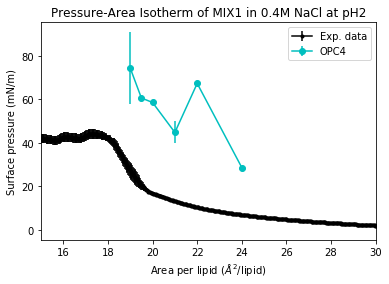

In [101]:
plt.errorbar(datdict['4Mix_0.4_M_NaCl_pH_2.xlsx'][0], datdict['4Mix_0.4_M_NaCl_pH_2.xlsx'][1], yerr=datdict['4Mix_0.4_M_NaCl_pH_2.xlsx'][2], marker='.', c='k', label='Exp. data')
#namd = np.array([55.64849181, 53.92095977, 19.88087505, 34.40559092, 25.17371431, -0.8249367152, -6.484251618, -2.030540332])
#nam = 53-(72-namd)
#plt.scatter([19, 19.5, 20, 20.5, 21, 22, 23, 24], nam, marker='o', c='skyblue')
plt.errorbar([19, 19.5, 20, 21, 22, 24], average, yerr=std, color='c', marker='o', label='OPC4')
plt.xlim(15, 30)
plt.xlabel('Area per lipid ($\AA^{2}$/lipid)')
plt.ylabel('Surface pressure (mN/m)')
plt.title('Pressure-Area Isotherm of MIX1 in 0.4M NaCl at pH2')
plt.legend(loc=1)